In [1]:
# Recommended: Run these in your Jupyter Notebook
!pip install tensorflow matplotlib seaborn


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28), Test: (10000, 28, 28)


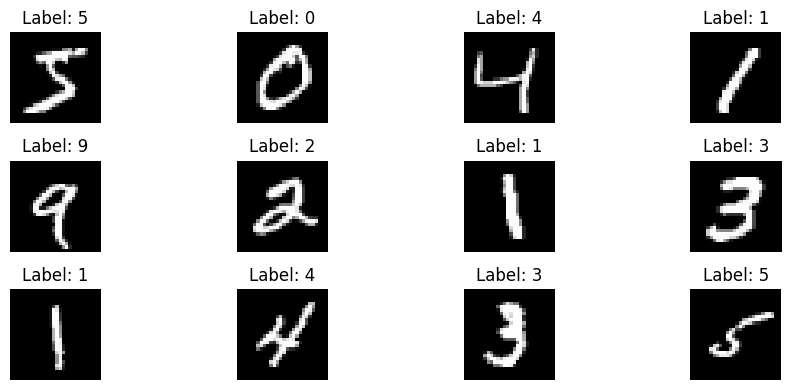

In [6]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f'Train: {x_train.shape}, Test: {x_test.shape}')

# Plot sample images
plt.figure(figsize=(10,4))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
# Reshape data for CNN and normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to categorical for classification
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


In [8]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    x_train, y_train_cat,
    epochs=6, batch_size=128,
    validation_data=(x_test, y_test_cat)
)


Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.8336 - loss: 0.5439 - val_accuracy: 0.9811 - val_loss: 0.0598
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.9772 - loss: 0.0753 - val_accuracy: 0.9866 - val_loss: 0.0411
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9899 - val_loss: 0.0322
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9878 - loss: 0.0403 - val_accuracy: 0.9903 - val_loss: 0.0286
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9898 - val_loss: 0.0288
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9911 - loss: 0.0258 - val_accuracy: 0.9914 - val_loss: 0.0254


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0328
Test Accuracy: 0.9914


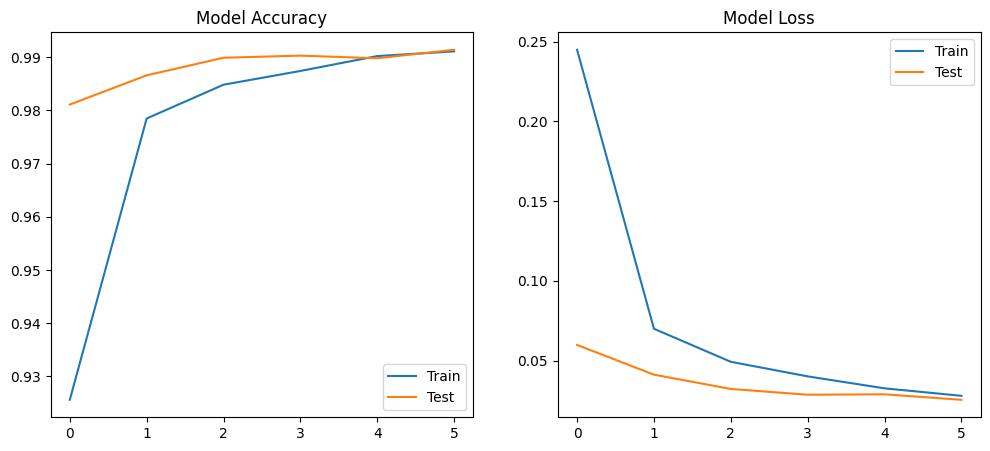

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Test'])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


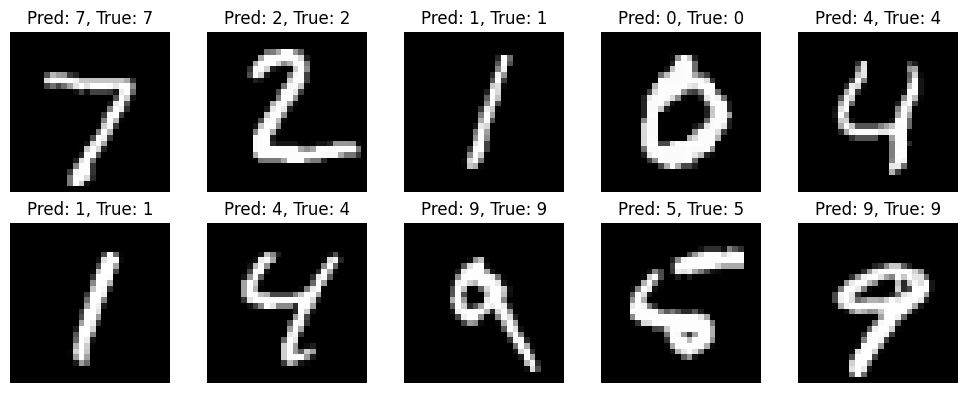

In [11]:
# Predict first 10 test samples
preds = np.argmax(model.predict(x_test[:10]), axis=1)
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f'Pred: {preds[i]}, True: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
